# Capstone Webscrapping using BeautifulSoup


Projek ini dikembangkan sebagai salah satu capstone project dari Algoritma Academy Data Analytics Specialization. Deliverables yang diharapkan dari projek ini adalah melakukan simple webscrapping untuk mendapatkan informasi. Untuk step by step guide, Bapak Ibu dipersilahkan untuk membuka git saya Click here:https://github.com/t3981-h/Webscrapping-with-BeautifulSoup. Kita juga akan memanfaatkan flask dashboard sederhana untuk menampilkan hasil scrap dan visualisasi kita.

## Background

IMDB https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31
adalah DATABASE yang  mencakup jutaan film, program TV dan hiburan, serta anggota pemeran dan kru.

IMDB dapat membantu:

--Membantu Anda tentang film, acara, atau orang 

--Temukan film atau acara terbaik untuk ditonton selanjutnya

--Berdayakan Anda untuk berbagi pengetahuan dan opini hiburan Anda dengan komunitas penggemar terbesar di dunia

## Environment Preparation and Setup 


1. Siapkan environment yang kosong
```
conda create -n <ENV_NAME> python=<PYTHON_VERSION>
```
conda create -n pandu_webscraping python=3.8
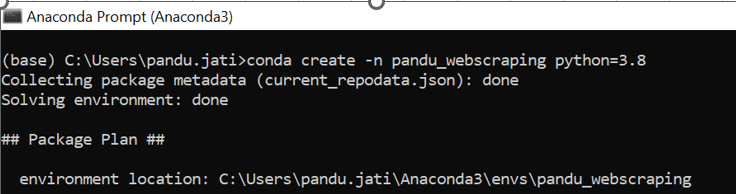
2. Aktifkan environment tersebut
```
conda activate <ENV_NAME>
conda activate pandu_webscraping
```
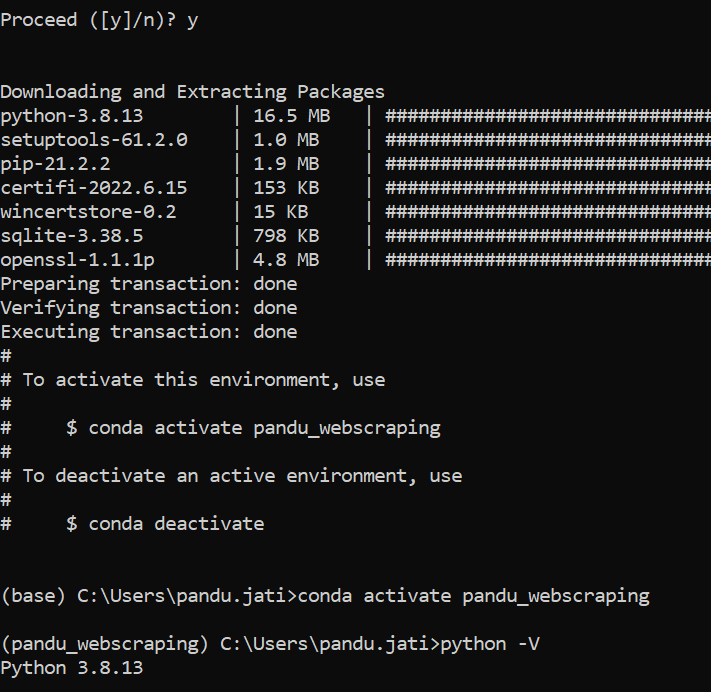
3. Navigasikan path ke folder di mana file `requirements.txt` berada
```
cd <PATH_TO_REQUIREMENTS>
cd "C:\Users\pandu.jati\Downloads\ALGORITMA W4\CAPSTONE\web_scraping-main\web_scraping-main"
```
4. Instalasi packages dari file tersebut
```
pip install -r requirements.txt
```
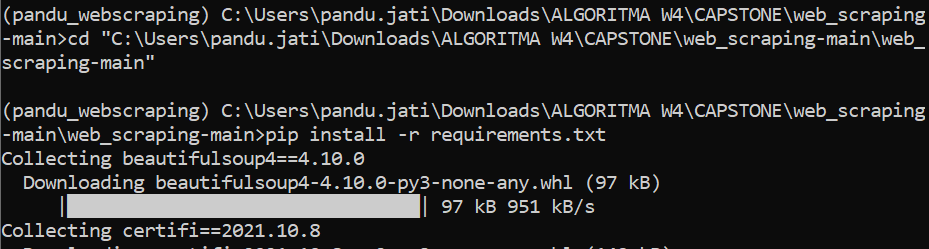


⚠️ Jangan lupa instalasi kernel di dalam environment tersebut apabila ingin dapat diakses menggunakan jupyter notebook:
```
pip install ipykernel
(pandu_webscraping) C:\Users\pandu.jati\Downloads\ALGORITMA W4\CAPSTONE\web_scraping-main\web_scraping-main>pip install ipykernel
```
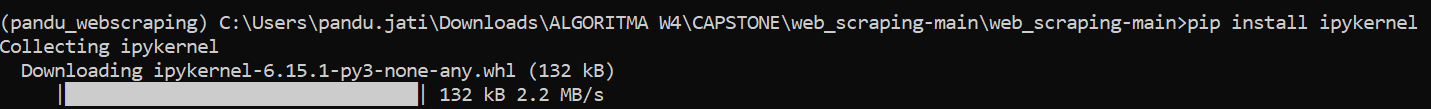

```
python -m ipykernel install --user --name=<ENV_NAME>
python -m ipykernel install --user --name=pandu_webscraping
````
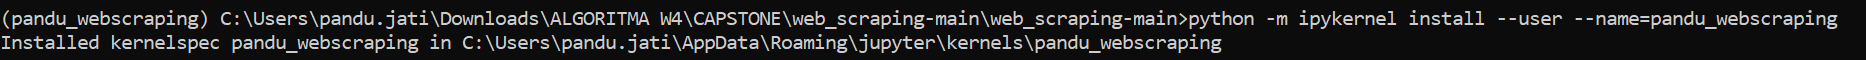

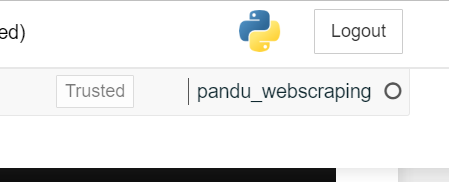

5. Export environment: membuat daftar packages beserta versinya.
```
pip list --format=freeze > requirements.txt
```
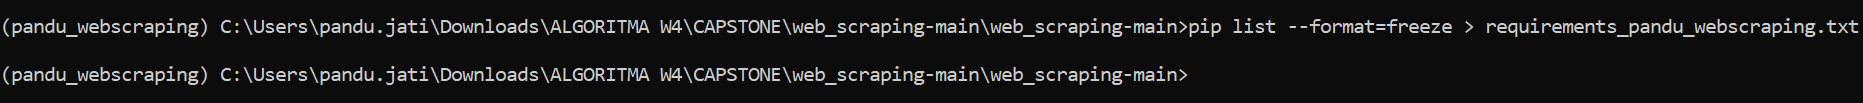
💡 Anda dapat menyimpan file dengan nama lain, namun sebagai **konvensi** biasa digunakan penamaan `requirements.txt`



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

##mengecek bentuk soup
soup


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Released between 2021-01-01 and 2021-12-31
(Sorted by Popularity Ascending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?release_date=2021-01-01,2021-1

In [4]:
## membedakan apabila menggunakan prettify untuk soup
## menjadi lebih mirip dengan mode "inspect" di website
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2021-01-01 and 2021-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imd

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

### Mencari alamat "inspect" di website

browsing pada website yang dicari, kemudian dilakukan mode inspect dengan cara klik kanan inspect
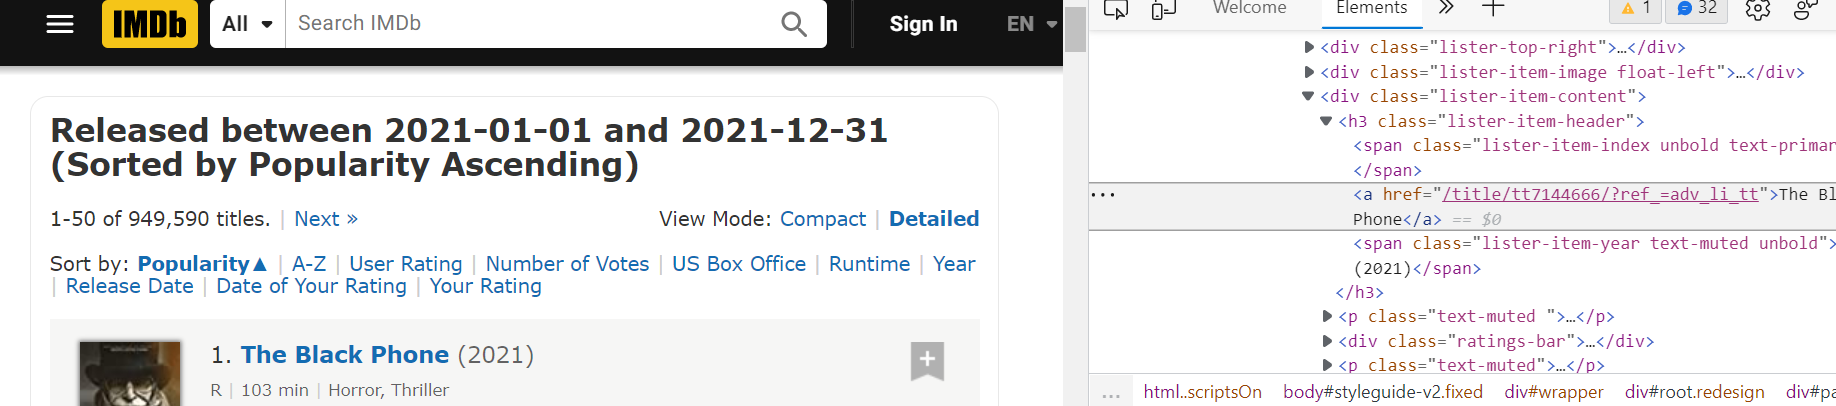

dari mode inspect didapatkan untuk mengcapture data yang dibutuhkan, semuanya ada di bagian "lister-list"
div class="lister-list"
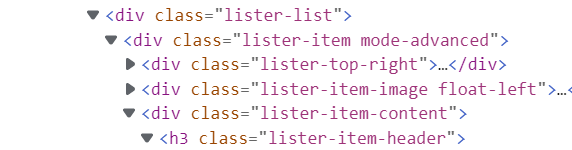

In [5]:
## membuat list dengan menyesuaikan nama pada mode "inspect" lister list di website
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt7144666">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt7144666/">
    <img alt="The Black Phone" class="loadlate" data-tconst="tt7144666" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BOWVmNTBiYTUtZWQ3Yi00ZDlhLTgyYjUtNzBhZjM3YjRiNGRkXkEyXkFqcGdeQXVyNzYyOTM1ODI@._V1_UX67_CR0,0,6


### Mengambil Nama Film dari website

didapatkan bahwa header dari nama film adalah h3 class="lister-item-header"
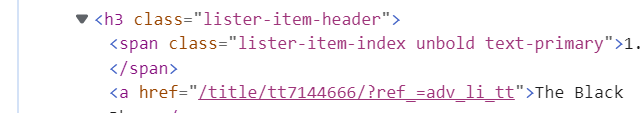

### Mengambil IMDB Rating dari website

didapatkan bahwa header dari IMDB rating adalah  div class='ratings-bar'
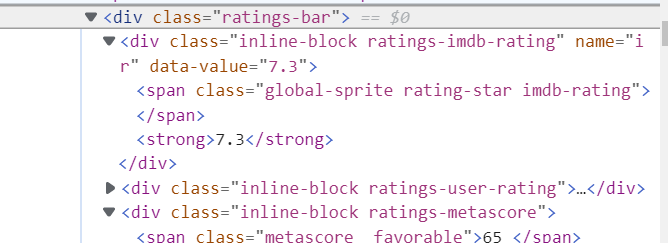

### Mengambil Metascore Rating  dari website

untuk mengambil metascore dari website adalah div class='ratings-bar'

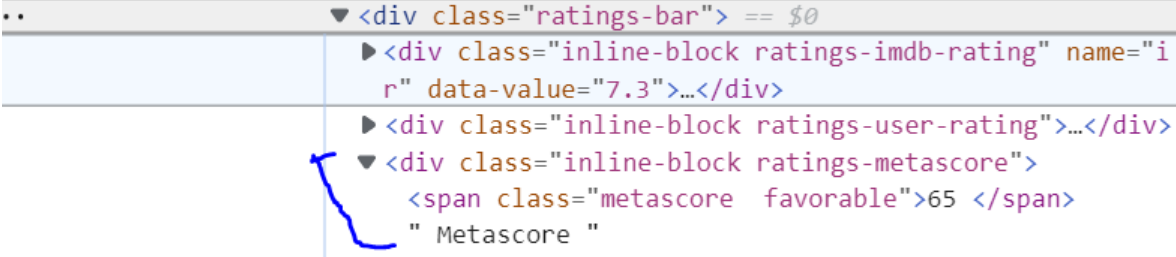

untuk memilih metascore, karena tidak semua film memiliki nilai meta score maka perlu filtering dan mengisi nilai 0 untuk yang tidak memiliki nilai meta score


### Mengambil Voting dari website

untuk mengambil nilai voting dari website adalah ('p', attrs={'class':'sort-num_votes-visible'})

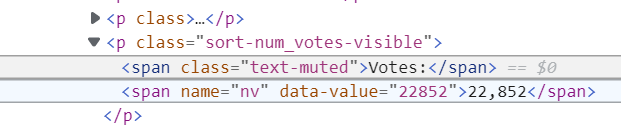

In [35]:
##Mengambil data sesuai tag di atas
nama_film = table.find_all('h3', attrs={'class':'lister-item-header'})
imdb_rating = table.find_all('div', attrs={'class':'ratings-bar'})
metascore_rating = table.find_all('div', attrs={'class':'ratings-bar'})
votes_counts = table.find_all('p', attrs={'class':'sort-num_votes-visible'})

Film_list=[]
imdb_rating_list=[]
metascore_rating_list =[]
votes_counts_list =[]

row_length = len(nama_film)

for i in range(row_length):
    Film_list.append(nama_film[i].find('a').text)
    imdb_rating_list.append(imdb_rating[i].find('strong').text)
    try:
        metascore_rating_list.append(metascore_rating[i].find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip())
    except:
        metascore_rating_list.append('0')
    votes_counts_list.append(votes_counts[i].find('span', attrs={'name':'nv'}).text.replace(',',''))                 


In [36]:
##Membuat tabelnya
import pandas as pd

tabel_all_df = pd.DataFrame({'JUDUL' :Film_list,
                        'RATING IMDB':imdb_rating_list,
                        'RATING METASCORE':metascore_rating_list,
                            'VOTING':votes_counts_list
                       })

tabel_all_df.head()

,JUDUL,RATING IMDB,RATING METASCORE,VOTING
0,The Black Phone,7.3,65,23714
1,Only Murders in the Building,8.1,0,73507
2,Sing 2,7.4,49,55541
3,Spider-Man: No Way Home,8.3,71,672875
4,1883,8.8,0,56044


## Creating data frame & Data wrangling

Put the array into dataframe

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [25]:
##Mengecek tipe data
tabel_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   JUDUL             50 non-null     object
 1   RATING IMDB       50 non-null     object
 2   RATING METASCORE  50 non-null     object
 3   VOTING            50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [26]:
## Mengubah tipe data voting menjadi integer
tabel_all_df['VOTING']=tabel_all_df['VOTING'].astype('int64')

In [27]:
## Mengubah tipe data rating metascore menjadi integer
tabel_all_df['RATING METASCORE']=tabel_all_df['RATING METASCORE'].astype('int64')

In [28]:
## Mengubah tipe data rating IMDB menjadi float
tabel_all_df['RATING IMDB']=tabel_all_df['RATING IMDB'].astype('float64')

In [29]:
## Mengecek tipe datanya
tabel_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JUDUL             50 non-null     object 
 1   RATING IMDB       50 non-null     float64
 2   RATING METASCORE  50 non-null     int64  
 3   VOTING            50 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [31]:
tabel_big7=tabel_all_df.head(7).copy()

In [32]:
tabel_big7.head(7)

,JUDUL,RATING IMDB,RATING METASCORE,VOTING
0,The Black Phone,7.3,65,23714
1,Only Murders in the Building,8.1,0,73507
2,Sing 2,7.4,49,55541
3,Spider-Man: No Way Home,8.3,71,672875
4,1883,8.8,0,56044
5,No Time to Die,7.3,68,372866
6,Superman & Lois,7.8,0,30541


<AxesSubplot:xlabel='JUDUL'>

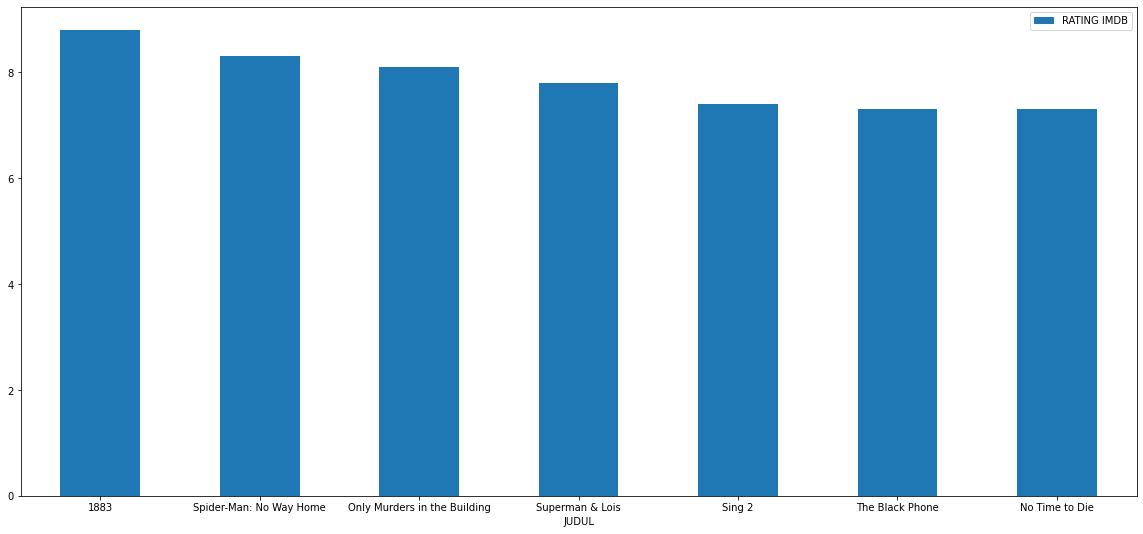

In [38]:
tabel_big7.sort_values(by='RATING IMDB', ascending=False).plot.bar(x='JUDUL', y='RATING IMDB',rot=0,figsize = (20,9)) 

<AxesSubplot:xlabel='JUDUL'>

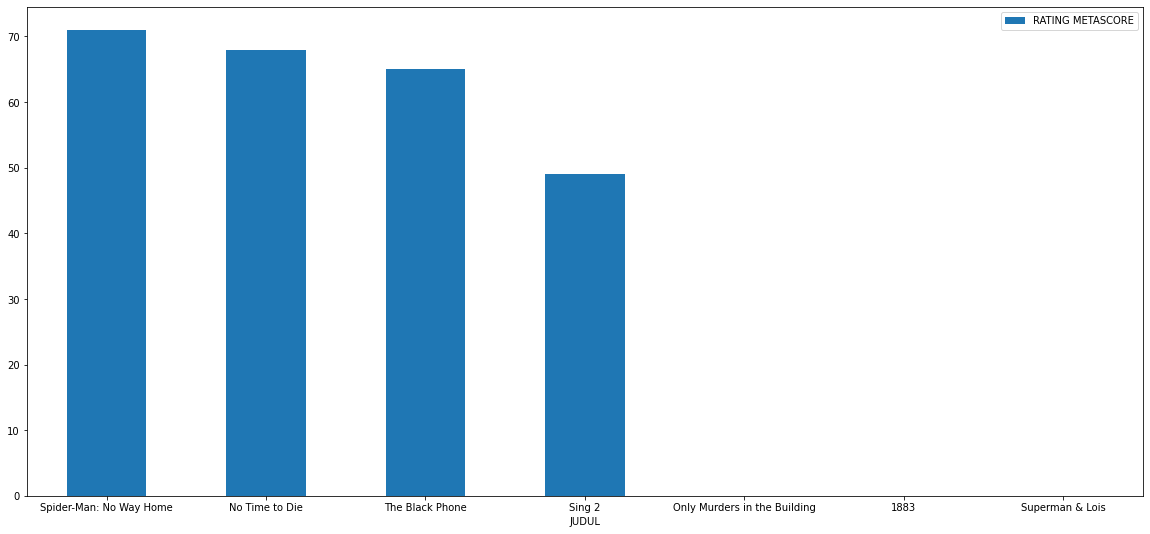

In [39]:
tabel_big7.sort_values(by='RATING METASCORE', ascending=False).plot.bar(x='JUDUL', y='RATING METASCORE',rot=0,figsize = (20,9)) 

<AxesSubplot:xlabel='JUDUL'>

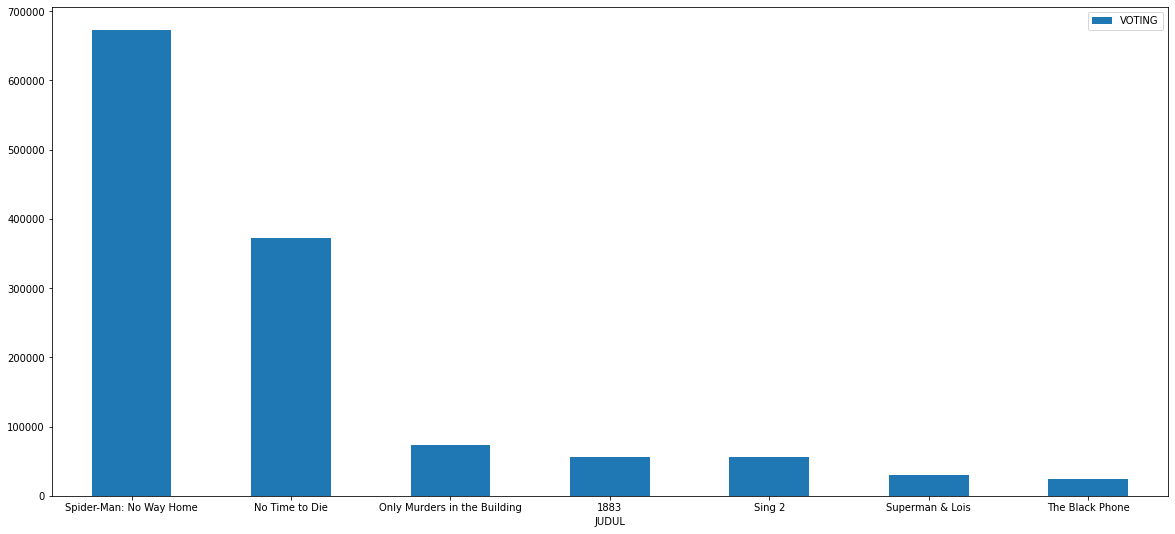

In [40]:
tabel_big7.sort_values(by='VOTING', ascending=False).plot.bar(x='JUDUL', y='VOTING',rot=0,figsize = (20,9)) 

In [42]:
round(tabel_big7["RATING IMDB"].mean(),2)

7.86

In [43]:
round(tabel_big7["RATING METASCORE"].mean(),2)

36.14

In [44]:
round(tabel_big7["VOTING"].mean(),2)

183584.0

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

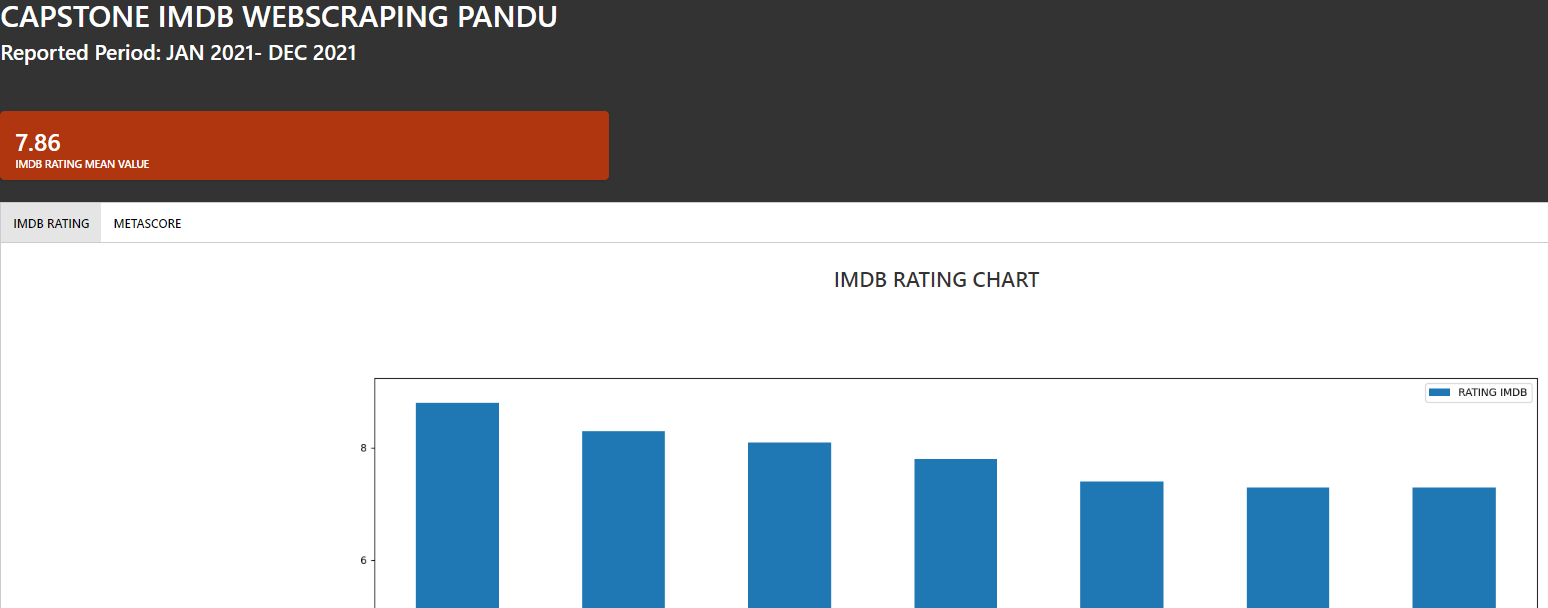

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

#Berdasarkan dari tampilan bar chart di atas, maka dapat disimpulkan

1. 'Spider-Man: No Way Home' secara overall bisa dikatakan film terpopuler, karena mendapatkan urutan 2 dari IMDB rating,
    dan mendapat peringkat 1 untuk metascore dan rating.
    adapun '1883' mendapatkan peringkat 1 untuk IMDB Rating, namun diikuti langsung oleh 'Spider-Man: No Way Home'.
    dimana 1883 relatif lemah secara voting, dibawah 100,000 dimana rata rata voting sudah 183584

    
2. Tambahan data Metascore sangat diperlukan untuk memberikan kepastian untuk film terpopuler/terbaik.
   dapat terlihat masih ada 3 film yang belum ada metascore nya, termasuk 1883




(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.